In [1]:
import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()

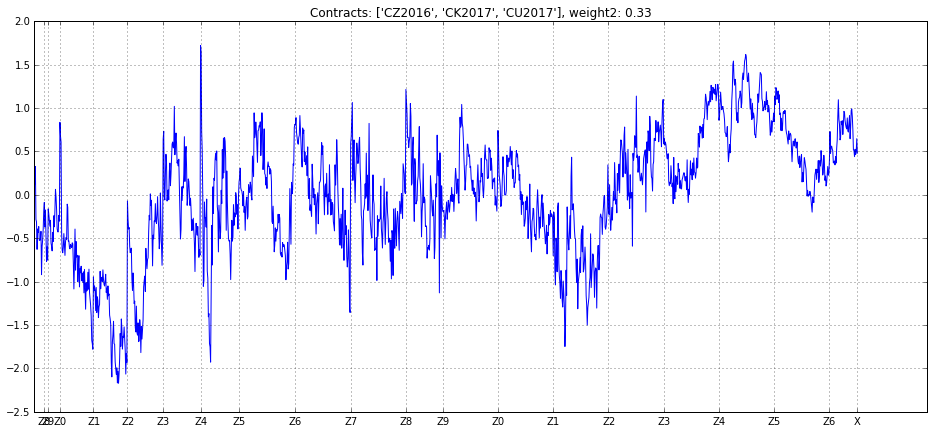

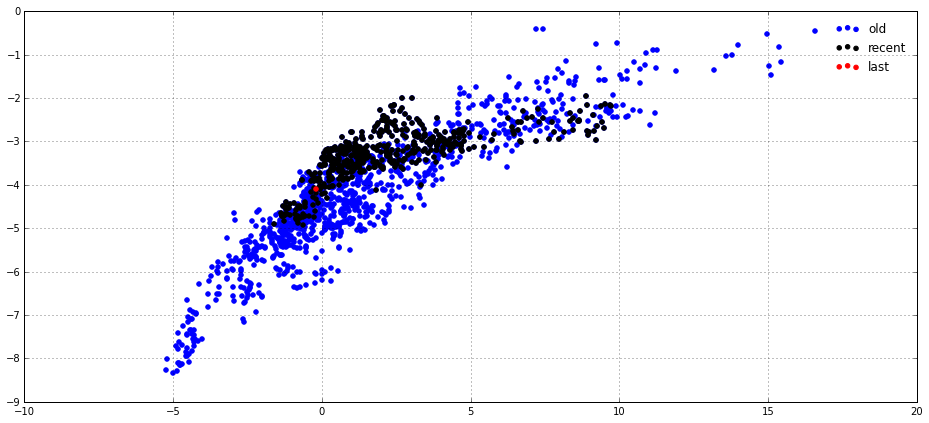

In [3]:

%matplotlib inline
import futures_charts.futures_curve as fc
#fc.get_futures_curve_chart_4date(ticker_head='RB',settle_date=report_date,tr_dte_limit=600)  # 600

no = 25

#aggregation_method, contracts_back
bf_signals_output = fc.get_butterfly_panel_plot(report_date=report_date,id=no)   # 315 so much to clean!!!
bf_signals_output = fc.get_butterfly_scatter_plot(report_date=report_date,id=no)





In [2]:
import get_price.presave_price as pp
pp.generate_and_update_futures_data_file_4tickerhead(ticker_head='HO')

In [12]:
import get_price.get_futures_price as gfp
gfp.get_futures_price_preloaded(ticker_head='ED',settle_date=20160217)

,settle_date,ticker,ticker_head,ticker_month,ticker_year,cal_dte,tr_dte,close_price,volume,cont_indx,change1,change2,change5,change10,change20,change_5,change_1
236359,2016-02-17,EDH2016,ED,3,2016,26,18,99.3575,219544,201603,NaN,NaN,NaN,NaN,NaN,0.0125,-0.005
236394,2016-02-17,EDJ2016,ED,4,2016,61,42,99.3400,1688,201604,NaN,NaN,NaN,NaN,NaN,0.0050,-0.005
236429,2016-02-17,EDK2016,ED,5,2016,89,62,99.3250,0,201605,NaN,NaN,NaN,NaN,NaN,-0.0050,-0.015
236464,2016-02-17,EDM2016,ED,6,2016,117,81,99.3150,314816,201606,NaN,NaN,NaN,NaN,NaN,0.0000,-0.020
236481,2016-02-17,EDN2016,ED,7,2016,152,105,99.3000,2,201607,NaN,NaN,NaN,NaN,NaN,-0.0100,-0.025
236516,2016-02-17,EDU2016,ED,9,2016,215,149,99.2750,225783,201609,NaN,NaN,NaN,NaN,NaN,-0.0150,-0.025
236551,2016-02-17,EDZ2016,ED,12,2016,306,213,99.2200,264250,201612,NaN,NaN,NaN,NaN,NaN,-0.0300,-0.030
236586,2016-02-17,EDH2017,ED,3,2017,390,271,99.1750,240482,201703,NaN,NaN,NaN,NaN,NaN,-0.0450,-0.030
236621,2016-02-17,EDM2017,ED,6,2017,488,339,99.1150,175044,201706,NaN,NaN,NaN,NaN,NaN,-0.0600,-0.035
236656,2016-02-17,EDU2017,ED,9,2017,579,402,99.0550,133355,201709,NaN,NaN,NaN,NaN,NaN,-0.0650,-0.035


In [10]:
print('Q:' + str(bf_signals_output['q']))
print('QF:' + str(bf_signals_output['qf']))
print('zscore1:' + str(bf_signals_output['zscore1']))
print('zscore2:' + str(bf_signals_output['zscore2']))
print('theo_pnl:' + str(bf_signals_output['theo_pnl']))

Q:62
QF:99
zscore1:0.850649218047
zscore2:0.904724189223
theo_pnl:-69.5469209534


In [50]:
aligned_data = bf_signals_output['aligned_output']['aligned_data']


grouped = aligned_data.groupby(aligned_data['c1']['cont_indx'])

aligned_data['shifted_residuals'] = grouped['residuals'].shift(-5)

aligned_data['residual_change'] = aligned_data['shifted_residuals']-aligned_data['residuals']

import statsmodels.api as sm

results = sm.OLS(aligned_data['residual_change'].values, aligned_data['residuals'].values, hasconst=True).fit()
results.params

import numpy as np

x=aligned_data['residuals'] 
y=aligned_data['residual_change'] 

nan_indx_x = np.isnan(x)
nan_indx_y = np.isnan(y)

clean_y = [y[i] for i in range(len(y)) if not nan_indx_x[i] and not nan_indx_y[i]]
clean_x = [x[i] for i in range(len(y)) if not nan_indx_x[i] and not nan_indx_y[i]]


results = sm.OLS(clean_y, sm.add_constant(clean_x), hasconst=True).fit()
results.conf_int()

array([[-0.00467772,  0.03873896],
       [-0.25729764, -0.19520576]])

In [25]:
import get_price.get_futures_price as gfp
data4_tickerhead = gfp.get_futures_price_4ticker(ticker_head='CL')


In [22]:
data4_tickerhead

,settle_date,ticker,ticker_head,ticker_month,ticker_year,cal_dte,tr_dte,close_price,volume
0,1983-03-30,CLM1983,CL,6,1983,51,36,29.4000,949
1,1983-03-30,CLN1983,CL,7,1983,83,57,29.3500,471
2,1983-03-30,CLQ1983,CL,8,1983,112,77,29.2000,216
3,1983-03-30,CLU1983,CL,9,1983,145,100,28.9500,160
4,1983-03-30,CLV1983,CL,10,1983,174,120,28.9500,18
5,1983-03-30,CLX1983,CL,11,1983,204,142,28.9000,32
6,1983-03-30,CLZ1983,CL,12,1983,236,164,28.7500,38
7,1983-03-31,CLM1983,CL,6,1983,50,35,29.2900,521
8,1983-03-31,CLN1983,CL,7,1983,82,56,29.2400,399
9,1983-03-31,CLQ1983,CL,8,1983,111,76,29.0500,300


In [28]:
import datetime as dt
import pandas as pd
dirty_data = pd.DataFrame.from_items([('ticker', ['CLG2008','CLH2008']), ('settle_date', [dt.date(2007,5,31),dt.date(2007,5,31)])])
data4_tickerhead
dirty_data



,ticker,settle_date
0,CLG2008,2007-05-31
1,CLH2008,2007-05-31


In [1]:
import get_price.presave_price as psp
psp.generate_and_update_futures_data_file_4tickerhead(ticker_head='HO')

In [26]:
import pandas as pd
import numpy as np
import get_price.presave_price as psp
dirty_data_points = psp.dirty_data_points
data4_tickerhead = pd.merge(data4_tickerhead, dirty_data_points, on=['settle_date', 'ticker'],how='left')
data4_tickerhead_filtered = data4_tickerhead[data4_tickerhead['discard'] !=True]

In [29]:
data4_tickerhead_filtered[(data4_tickerhead_filtered['settle_date']==dirty_data_points['settle_date'][0])&
                 (data4_tickerhead_filtered['ticker']==dirty_data_points['ticker'][0])]

,settle_date,ticker,ticker_head,ticker_month,ticker_year,cal_dte,tr_dte,close_price,volume,discard


In [18]:
data4_tickerhead

,settle_date,ticker,ticker_head,ticker_month,ticker_year,cal_dte,tr_dte,close_price,volume,discard
0,1983-03-30,CLM1983,CL,6,1983,51,36,29.4000,949,NaN
1,1983-03-30,CLN1983,CL,7,1983,83,57,29.3500,471,NaN
2,1983-03-30,CLQ1983,CL,8,1983,112,77,29.2000,216,NaN
3,1983-03-30,CLU1983,CL,9,1983,145,100,28.9500,160,NaN
4,1983-03-30,CLV1983,CL,10,1983,174,120,28.9500,18,NaN
5,1983-03-30,CLX1983,CL,11,1983,204,142,28.9000,32,NaN
6,1983-03-30,CLZ1983,CL,12,1983,236,164,28.7500,38,NaN
7,1983-03-31,CLM1983,CL,6,1983,50,35,29.2900,521,NaN
8,1983-03-31,CLN1983,CL,7,1983,82,56,29.2400,399,NaN
9,1983-03-31,CLQ1983,CL,8,1983,111,76,29.0500,300,NaN
